In [1]:
from pathlib import Path
import sys

import numpy as np
import matplotlib as mlab
import matplotlib.pyplot as plt
import xarray as xr
import os as os
import glob
import matplotlib.gridspec as gridspec
import metpy.calc as mpcalc
from metpy.units import units
import pickle

In [43]:
f1900 = xr.open_dataset("/scratch/ywang/MPAS/intel/run_dirs/summary_files/20240508_denseobs4/1900/wofs_ALL_00_20240508_1900_1900.nc")
f1905 = xr.open_dataset("/scratch/ywang/MPAS/intel/run_dirs/summary_files/20240508_denseobs4/1900/wofs_ALL_01_20240508_1900_1905.nc")
f1910 = xr.open_dataset("/scratch/ywang/MPAS/intel/run_dirs/summary_files/20240508_denseobs4/1900/wofs_ALL_02_20240508_1900_1910.nc")
f1915 = xr.open_dataset("/scratch/ywang/MPAS/intel/run_dirs/summary_files/20240508_denseobs4/1900/wofs_ALL_03_20240508_1900_1915.nc")

In [47]:
w_1900 = f1900['w_1km'].values
w_1905 = f1905['w_1km'].values
w_1910 = f1910['w_1km'].values
w_1915 = f1915['w_1km'].values
w_1915.shape

(18, 300, 300)

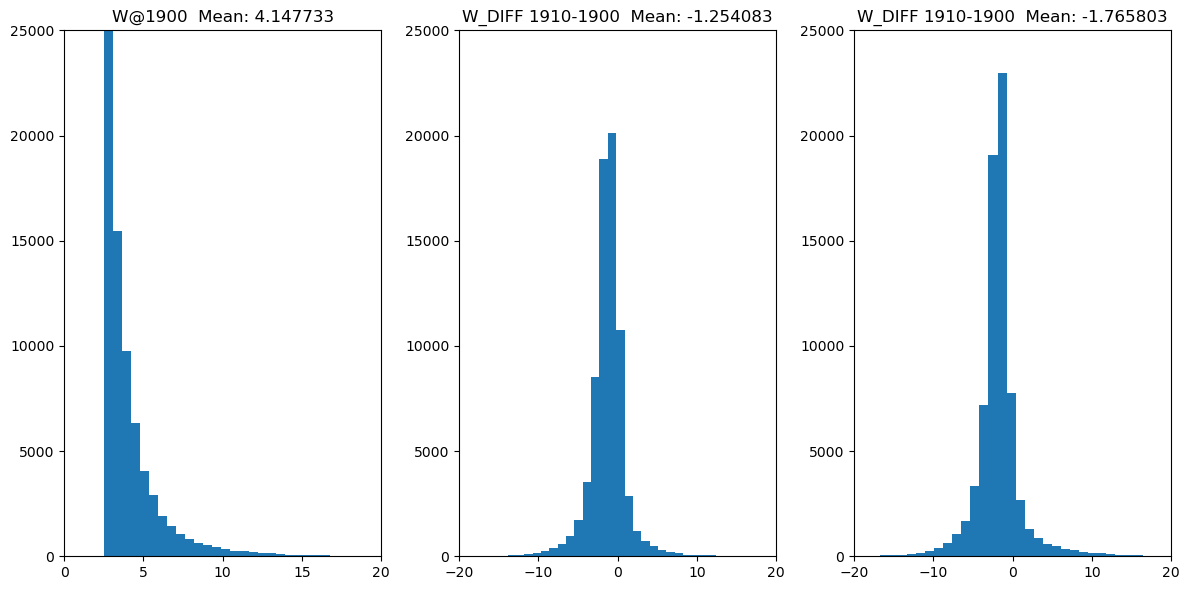

In [65]:
def plot_hist(a, n_bins, amin, ax, xscale, yscale, title=None):
    b = a[a > amin].flatten()
    ax.hist(b, bins=n_bins)
    ax.set_title( "%s  Mean: %f" % (title, b.mean()) )
    ax.set_xlim(xscale)
    ax.set_ylim(yscale)


n_bins = 50
wmin = 2.5


fig, axs = plt.subplots(1, 3, tight_layout=True, figsize=(12,6))

plot_hist( w_1900, n_bins, wmin, axs[0], [0.0, 20.], [0.0, 25000], "W@1900")
plot_hist((w_1910 - w_1900)[w_1900 > wmin], n_bins, -100, axs[1], [-20.0, 20.], [0.0, 25000], "W_DIFF 1910-1900")
plot_hist((w_1915 - w_1900)[w_1900 > wmin], n_bins, -100, axs[2], [-20.0, 20.], [0.0, 25000], "W_DIFF 1910-1900")


In [49]:
def stat(a, amin):
    return a[a > amin].flatten().mean(), a[a > amin].flatten().std()

print( stat(w_1900, wmin))
print( stat(w_1905, wmin))
print( stat(w_1910, wmin))
print( stat(w_1915, wmin))

(3.507282767393735, 1.9520561823477667)
(3.507282767393735, 1.9520561823477667)
(3.552975438892054, 2.3312910309274537)
(4.056392214168334, 3.1614031104237537)


In [10]:
u_f72 = f72['U'].values
u_f96 = f96['U'].values

In [11]:
u_diff = u_f72[0] - u_f96[0]
print(u_diff.max(), u_diff.min())

0.0 0.0


Text(0.5, 1.0, 'U Difference Field for k=10\nMax: 0.000000 Min 0.000000')

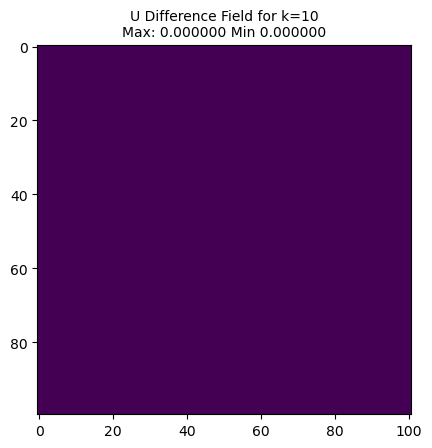

In [12]:
plt.imshow(u_diff[10])
plt.title("U Difference Field for k=%i\nMax: %f Min %f" % (klevel, u_diff.max(), u_diff.min()), fontsize=10)